# Imports

In [1]:

from sklearn import preprocessing

from models.neural_net import NeuralNet
from view.visualizer import *



# Dataset creation

In [2]:
xd = 3  # Input space dimensions
yd = 4  # Output dimension
num_samples = 1000  # Number of data points
epochs = 100  # Number of training epochs
l = [100]  # Number of neurons in each layer

dataset = Dataset()
dataset.create_dataset_sinus_2d(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-2, 2)))
dataset.split_train_test(0.2)



# Neural Network training with Adam

In [3]:
from utils.preprocessing import find_center_and_magnitude

model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=100)
y_nn_train = model_nn.predict(dataset.X_train)
y_nn_test = model_nn.predict(dataset.X_test)

mean, magnitude = find_center_and_magnitude(model_nn.weights[0], model_nn.biases[0])
print("Mean of the solution X.w[0]-b[0] = 0", mean)
print("Mean of the magnitude of w[0]", magnitude)


Mean of the solution X.w[0]-b[0] = 0 0.008263238
Mean of the magnitude of w[0] 1.2954459


# Sampled Netwrok training.
### very first algorithm


Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 6381.01it/s]

train: loss(y_nn, y_sampled)
r2: -0.3702573367579177	mse: 2.1698937496887014
test: loss(y_nn, y_sampled)
r2: -0.507233888973802	mse: 2.42542582823269
weights1 equals weights2:  False


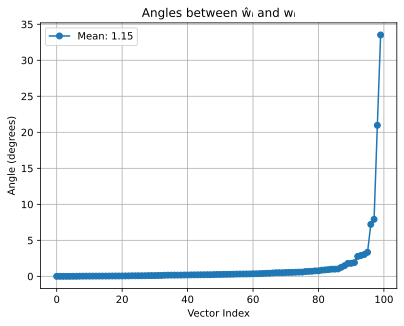

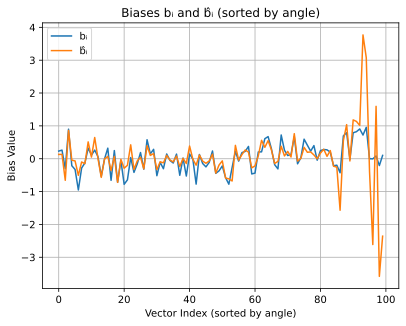

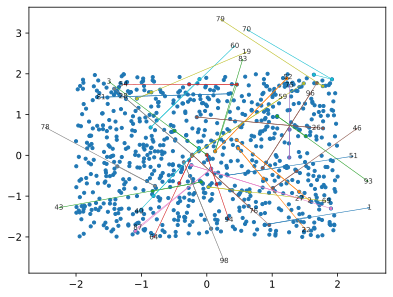

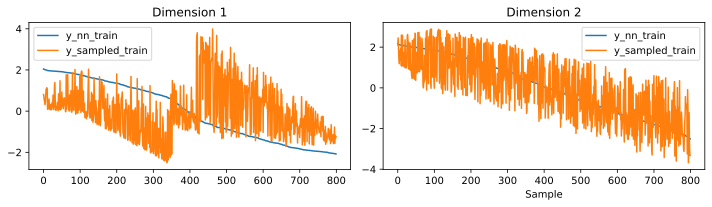

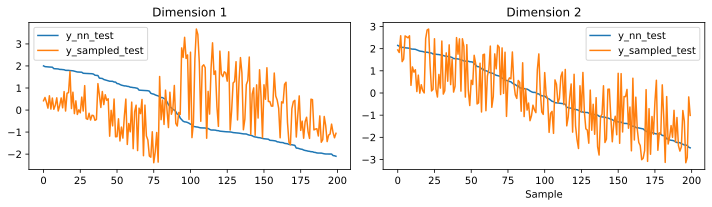

In [4]:
model_sampled = SampledNet()
x_1_X2_tuples = model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="classic", choose_x_2="angle")

model_nn_vs_model_sampled(dataset, model_nn, model_sampled, x_1_X2_tuples)

### add radius: an interval for the distance to the bias origin, and choose x_2, so that \hat{w_i} is the closest to w_i, by Euclidean distance between the two tips

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 102.62it/s]


train: loss(y_nn, y_sampled)
r2: 0.9849406040917504	mse: 0.027977353594092848
test: loss(y_nn, y_sampled)
r2: 0.9844655727381112	mse: 0.02787210910199979
weights1 equals weights2:  False


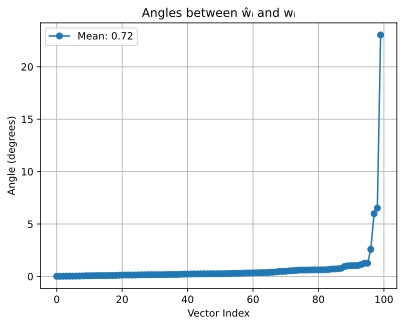

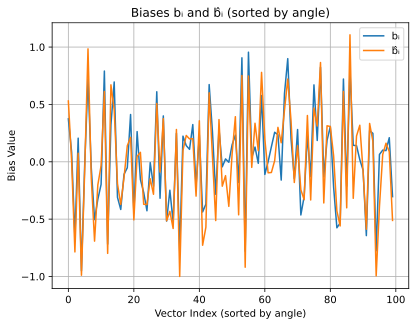

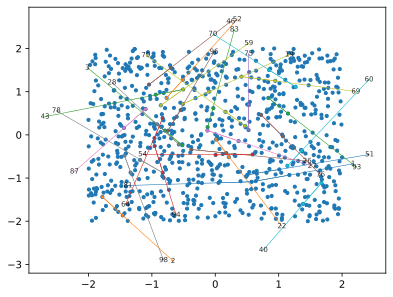

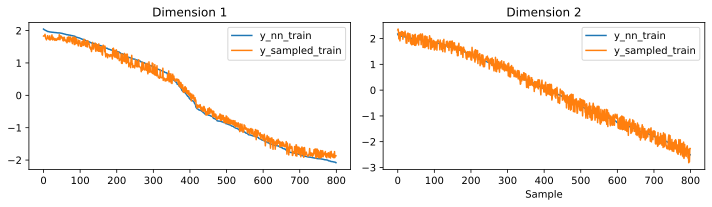

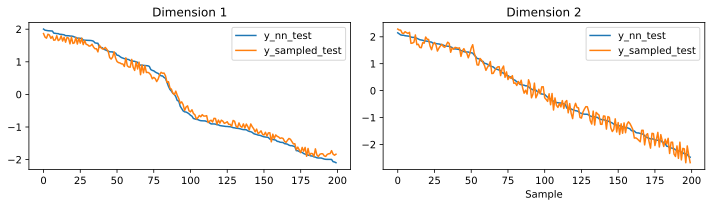

In [5]:
model_sampled = SampledNet()
x_1_X2_tuples = model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="classic", radius=0.09,
                                  choose_x_2="norm")
model_nn_vs_model_sampled(dataset, model_nn, model_sampled, x_1_X2_tuples)


### additionally shift x_1 and x_2 so that x_1 lies on the original bias origin

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 102.45it/s]


train: loss(y_nn, y_sampled)
r2: 0.9984767166230828	mse: 0.0030303179452544106
test: loss(y_nn, y_sampled)
r2: 0.99829027437714	mse: 0.003289047669985148
weights1 equals weights2:  False


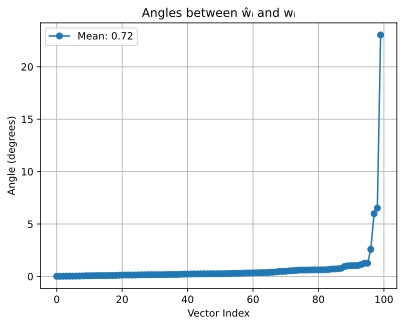

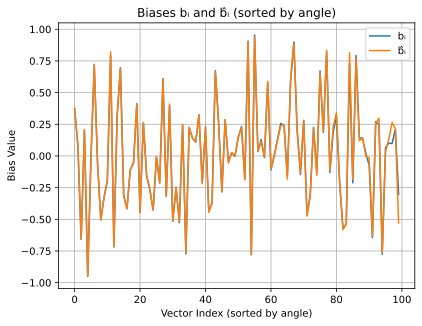

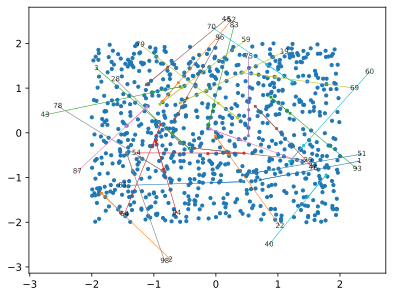

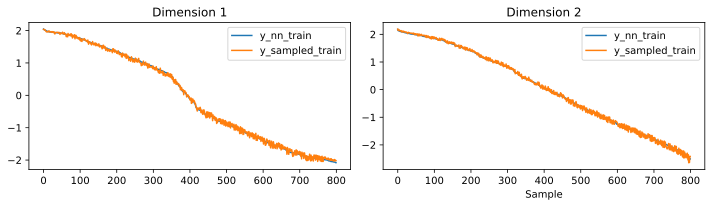

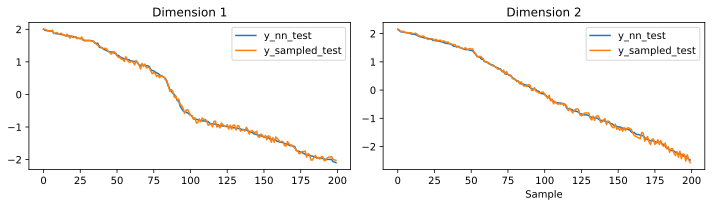

In [6]:
model_sampled = SampledNet()
x_1_X2_tuples = model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="classic", radius=0.09,
                                  choose_x_2="norm", project_onto_boundary=True)

model_nn_vs_model_sampled(dataset, model_nn, model_sampled, x_1_X2_tuples)


### use ridge regression for layer 2

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 168.19it/s]


alpha 	loss validation
0.0001 	9.998e-05
0.001 	1.033e-04
0.01 	1.142e-04
0.1 	1.945e-04
1 	6.161e-04
10 	4.170e-03
100 	6.545e-02
train: loss(y_nn, y_sampled)
r2: 0.9999565502096655	mse: 8.588842543476434e-05
test: loss(y_nn, y_sampled)
r2: 0.9999306171909135	mse: 0.00013116098879075024
weights1 equals weights2:  False


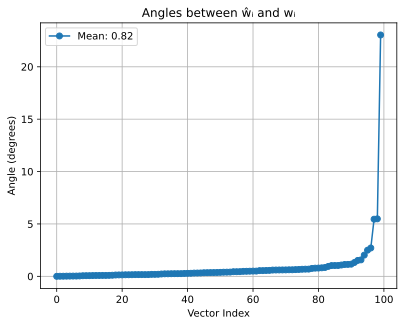

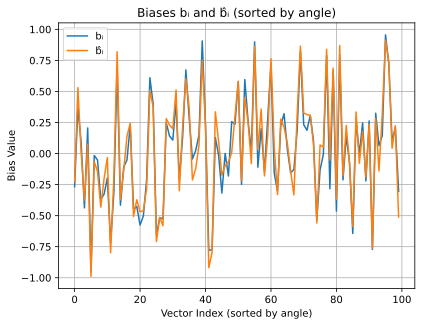

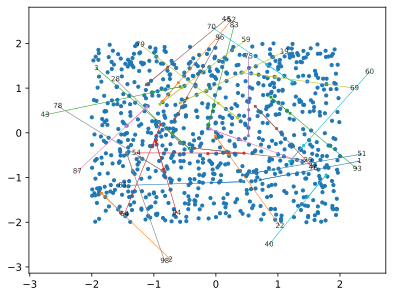

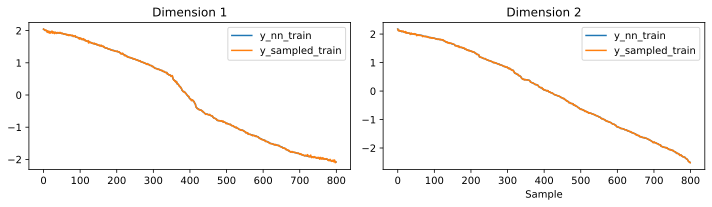

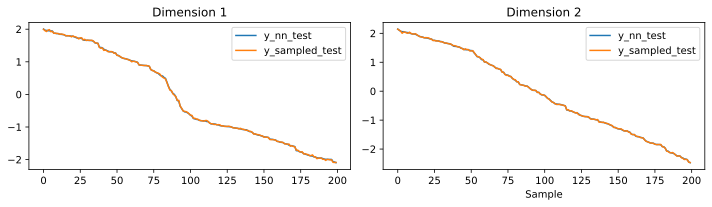

In [7]:
model_sampled = SampledNet()
model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="ridge", radius=0.05,
                  choose_x_2="norm")

model_nn_vs_model_sampled(dataset, model_nn, model_sampled, x_1_X2_tuples)


### Calculate radius vs loss.

In [8]:

y_nn_train = model_nn.predict(dataset.X_train)
y_nn_test = model_nn.predict(dataset.X_test)
weight1 = []
weight2 = []
losses = []
radii = np.linspace(0, 0.5, 10)
for radius in radii:
    model_sampled = SampledNet()
    model_sampled.fit(
        dataset.X_train, y_nn_train, model_nn, layer2="classic", radius=radius, alpha=-1, verbose=0
    )
    weight1.append(model_sampled.weights[0])
    weight2.append(model_nn.weights[0])
    y_sampled_test = model_sampled.predict(dataset.X_test)
    loss_sampled_nn = loss_mse(y_sampled_test, y_nn_test)
    losses.append(loss_sampled_nn)
    print(loss_sampled_nn)

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 6379.65it/s]


0.06002569483898253


Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 145.62it/s]


0.018810553235840848


Layer1 sampling: 100%|██████████| 100/100 [00:01<00:00, 76.20it/s]


0.043764791918598916


Layer1 sampling: 100%|██████████| 100/100 [00:01<00:00, 52.76it/s]


0.18448876339744522


Layer1 sampling: 100%|██████████| 100/100 [00:03<00:00, 30.68it/s]


0.40584446082373626


Layer1 sampling: 100%|██████████| 100/100 [00:03<00:00, 30.04it/s]


0.46470288910760676


Layer1 sampling: 100%|██████████| 100/100 [00:04<00:00, 22.71it/s]


1.3805346594714367


Layer1 sampling: 100%|██████████| 100/100 [00:04<00:00, 22.90it/s]


1.661621892727033


Layer1 sampling: 100%|██████████| 100/100 [00:05<00:00, 18.52it/s]


2.2444644591241527


Layer1 sampling: 100%|██████████| 100/100 [00:06<00:00, 15.71it/s]

2.4306517173419935


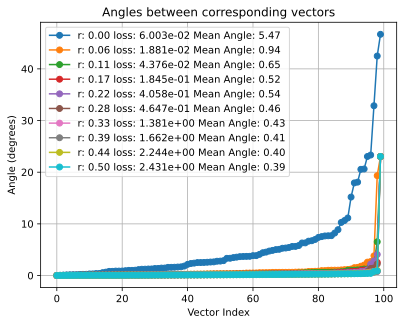

In [9]:
plot_vector_differences(weight1, weight2, radii, losses)

### augment data with gaussian sampling

Layer1 sampling: 100%|██████████| 100/100 [00:00<00:00, 189.77it/s]


Before data augmentation
train: loss(y_nn, y_sampled)
r2: 0.7131361484259582	mse: 0.3976919357749191
test: loss(y_nn, y_sampled)
r2: -0.14995815833311332	mse: 0.8378544183345639
weights1 equals weights2:  False


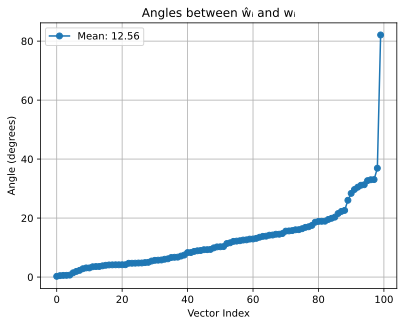

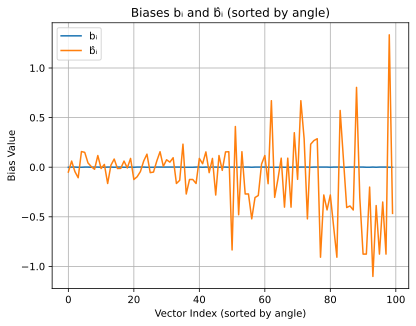

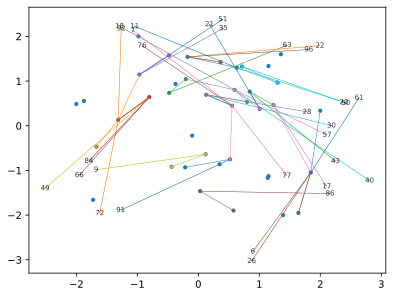

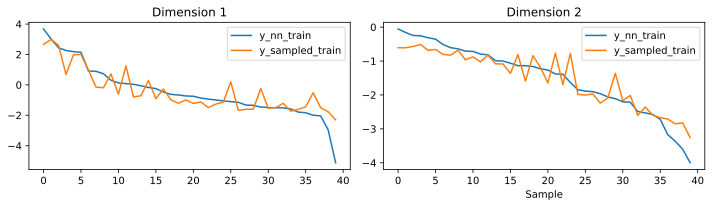

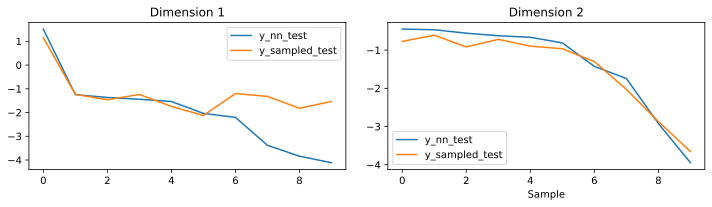

After data augmentation
train: loss(y_nn, y_sampled)
r2: 0.9856286400249856	mse: 0.019625881587769824
test: loss(y_nn, y_sampled)
r2: 0.9818017261381664	mse: 0.03262988364387032
weights1 equals weights2:  False


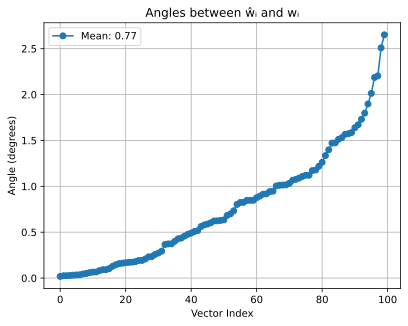

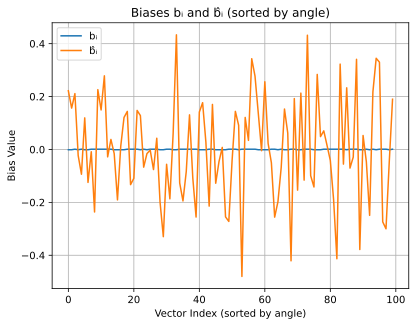

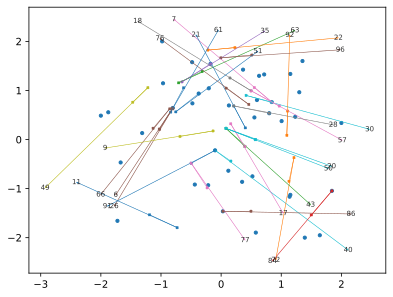

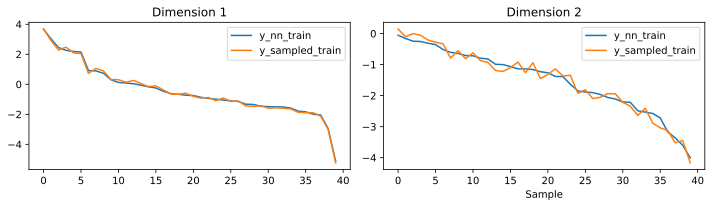

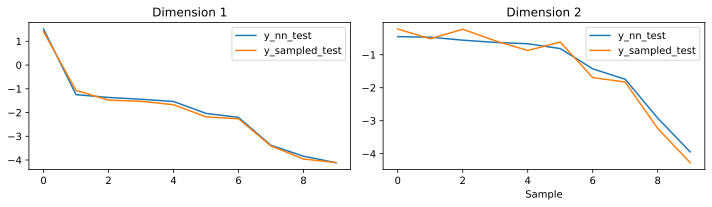

In [10]:
xd = 3  # Input space dimensions
yd = 4  # Output dimension
num_samples = 50  # Number of data points
epochs = 100  # Number of training epochs
l = [100]  # Number of neurons in each layer

dataset = Dataset()
dataset.create_dataset_sinus_2d(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-2, 2)))
dataset.split_train_test(0.2)

model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=1)
y_nn_train = model_nn.predict(dataset.X_train)
y_nn_test = model_nn.predict(dataset.X_test)

model_sampled = SampledNet()
x_1_X2_tuples = model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="classic", radius=0.05,
                                  choose_x_2="norm")

model_sampled_input_augmented = SampledNet()
x_1_X2_tuples_input_augmented = model_sampled_input_augmented.fit(dataset.X_train, y_nn_train, model_nn,
                                                                  layer2="classic",
                                                                  radius=0.05,
                                                                  choose_x_2="norm", augment_data=(1, 10))

print("Before data augmentation")
model_nn_vs_model_sampled(dataset, model_nn, model_sampled, x_1_X2_tuples)
print("After data augmentation")
model_nn_vs_model_sampled(dataset, model_nn, model_sampled_input_augmented, x_1_X2_tuples_input_augmented)
